In [1]:
import pandas_datareader
import matplotlib.pyplot as plt

In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = '1926-01-01'

In [4]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read() # monthly frequency

In [5]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.38 -2.73  0.22
 1926-08    2.64 -1.47  4.14  0.25
 1926-09    0.36 -1.39  0.12  0.23
 1926-10   -3.24 -0.13  0.65  0.32
 1926-11    2.53 -0.16 -0.38  0.31
 ...         ...   ...   ...   ...
 2022-02   -2.29  2.18  3.09  0.00
 2022-03    3.05 -1.61 -1.82  0.01
 2022-04   -9.46 -1.40  6.16  0.01
 2022-05   -0.34 -1.87  8.38  0.03
 2022-06   -8.43  2.09 -5.93  0.06
 
 [1152 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.83  -3.40  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.69  11.65  4.75
 1930  -31.23  -5.34 -11.76  2.41
 1931  -45.11   3.64 -14.56  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -5.02 -13.51  0.80
 2018   -6.95  -3.29  -9.80  1.83
 2019   28.28  -6.13 -10.20  2.15
 2020   23.66  12.96 -46.46  0.45
 2021   23.56  -3.97  25.55  0.04
 
 [95 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [6]:
ff_df = ff[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86450a9bd0>,
      dtype=object)

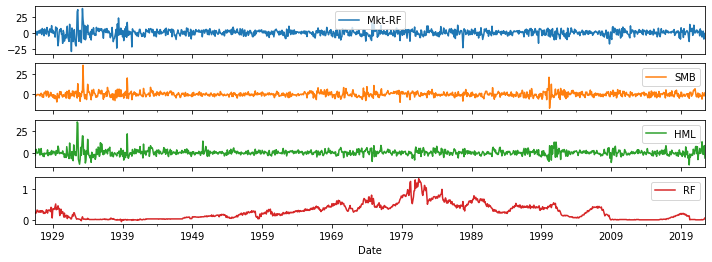

In [7]:
ff_df.plot(subplots=True, figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8644d64f90>,
      dtype=object)

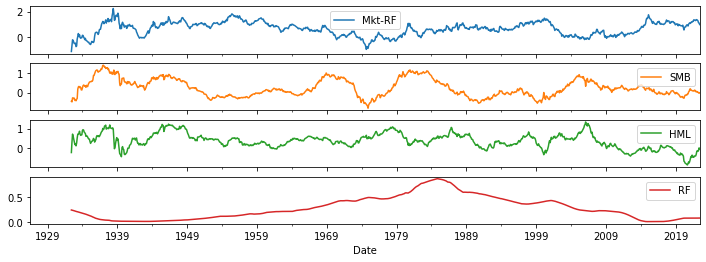

In [8]:
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [9]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start = start).read()[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8642e01190>],
      dtype=object)

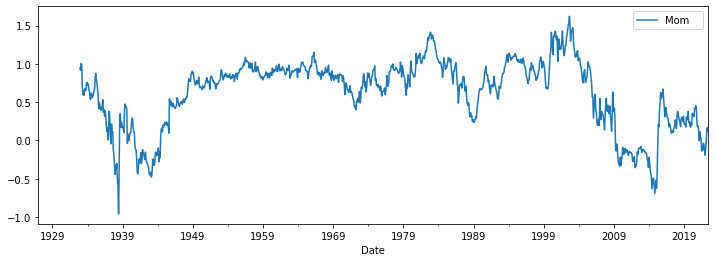

In [10]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [11]:
import pandas as pd
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on= 'Date', how='inner', sort=True, copy=True, indicator=False, validate='one_to_one') # merging the two dataframes

In [12]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.51,4.73,0.25,0.36
1927-02,4.18,-0.25,3.27,0.26,-2.14
1927-03,0.13,-1.89,-2.56,0.30,3.61
1927-04,0.46,0.49,0.71,0.25,4.30
1927-05,5.44,1.46,4.98,0.30,3.00
...,...,...,...,...,...
2022-02,-2.29,2.18,3.09,0.00,1.75
2022-03,3.05,-1.61,-1.82,0.01,2.98
2022-04,-9.46,-1.40,6.16,0.01,4.88


In [14]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import yfinance as yf
yf.pdr_override()

In [17]:
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [18]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158162
                ...   
2022-04-30   -0.097131
2022-05-31   -0.054496
2022-06-30   -0.081430
2022-07-31    0.188634
2022-08-31    0.038238
Freq: M, Name: Adj Close, Length: 501, dtype: float64

In [20]:
AAPL_df = AAPL_data.to_frame()
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158162
...,...
2022-04-30,-0.097131
2022-05-31,-0.054496
2022-06-30,-0.081430


In [21]:
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [22]:
ffac_merged_df ['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df ['dt_date'] =  pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [42]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how='inner', on = 'dt_date', sort=True, copy=True, indicator=False, validate='one_to_one')
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)
AAPL_ffac_merge_df.rename(columns={'Adj Close' : 'AAPL'}, inplace=True)
AAPL_ffac_merge_df.rename(columns={'Mom   ' : 'MOM'}, inplace=True)
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91
...,...,...,...,...,...,...,...
494,-0.054066,2022-02,-2.29,2.18,3.09,0.00,1.75
495,0.057473,2022-03,3.05,-1.61,-1.82,0.01,2.98
496,-0.097131,2022-04,-9.46,-1.40,6.16,0.01,4.88
497,-0.054496,2022-05,-0.34,-1.87,8.38,0.03,2.47


In [43]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100 - AAPL_ffac_merge_df['RF']
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256295
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264252
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757529
4,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736204
...,...,...,...,...,...,...,...,...
494,-0.054066,2022-02,-2.29,2.18,3.09,0.00,1.75,-5.406578
495,0.057473,2022-03,3.05,-1.61,-1.82,0.01,2.98,5.737337
496,-0.097131,2022-04,-9.46,-1.40,6.16,0.01,4.88,-9.723080
497,-0.054496,2022-05,-0.34,-1.87,8.38,0.03,2.47,-5.479608


In [44]:
AAPL_ffac_merge_df.dropna(axis=0, inplace=True)

In [45]:
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df['AAPL_RF'], AAPL_ffac_merge_df[['Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.285
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              49.26
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                    6.99e-35
Time:                        12:52:28   Log-Likelihood:                         -1903.0
No. Observations:                 498   AIC:                                      3814.
Df Residuals:                     494   BIC:                                      3831.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2662      0.117     10.791      0.000       1.036       1.497
SMB            0.2241      0.174      1.287      0.199      -0.118       0.566
HML           -0.8357      0.171     -4.899      0.000      -1.171      -0.501
MOM           -0.0556      0.119     -0.469      0.639      -0.288       0.177
==============================================================================
Omnibus:                       14.219   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.661
Skew:                          -0.059   Prob(JB):                     5.97e-07
Kurtosis:                       4.169   Cond. No.                         1.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df, prepend=True)
AAPL_ffac_merge_df_c

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256295
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264252
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757529
4,1.0,0.158162,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736204
5,1.0,0.167399,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589874
...,...,...,...,...,...,...,...,...,...
494,1.0,-0.054066,2022-02,-2.29,2.18,3.09,0.00,1.75,-5.406578
495,1.0,0.057473,2022-03,3.05,-1.61,-1.82,0.01,2.98,5.737337
496,1.0,-0.097131,2022-04,-9.46,-1.40,6.16,0.01,4.88,-9.723080
497,1.0,-0.054496,2022-05,-0.34,-1.87,8.38,0.03,2.47,-5.479608


In [52]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'], AAPL_ffac_merge_df_c[['const', 'Mkt-RF', 'SMB', 'HML', 'MOM']], missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     48.12
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.61e-34
Time:                        12:57:23   Log-Likelihood:                -1898.9
No. Observations:                 498   AIC:                             3808.
Df Residuals:                     493   BIC:                             3829.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4735      0.511      2.882      0.004       0.469       2.478
Mkt-RF         1.1971      0.119     10.066      0.000       0.963       1.431
SMB            0.2172      0.173      1.256      0.210      -0.123       0.557
HML           -0.9178      0.172     -5.345      0.000      -1.255      -0.580
MOM           -0.1189      0.120     -0.993      0.321      -0.354       0.116
==============================================================================
Omnibus:                       13.458   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.364
Skew:                          -0.056   Prob(JB):                     1.88e-06
Kurtosis:                       4.122   Cond. No.                         5.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""